## **Crop Recommendation System**

# **Introduction**

Agriculture is a critical component of the global economy, providing food and raw materials to billions of people. With the advancement of technology, data-driven approaches have been increasingly utilized to enhance agricultural productivity and sustainability. One such approach is the development of crop recommendation systems that suggest the most suitable crops for cultivation based on various environmental and soil parameters.

The primary goal of this project is to build a machine learning model that can predict the best crop to grow given specific conditions. This can help farmers make informed decisions, potentially increasing yields and reducing resource waste.

### **Objectives**
- To understand the dataset and preprocess it for analysis.
- To perform exploratory data analysis (EDA) to uncover patterns and relationships.
- To build and evaluate machine learning models for crop recommendation.
- To optimize the model using hyperparameter tuning for better accuracy.


In [4]:
from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


https://www.kaggle.com/code/niteshhalai/crop-recommendation-dataset  - dataset source


### ***Loading and Inspecting the Data***

In this section, we load the crop recommendation dataset and perform an initial inspection to understand its structure and contents. This helps us identify the types of variables present, any missing values, and basic statistics of the dataset.


In [6]:
import pandas as pd

# path to CSV file
file_path = '/content/drive/My Drive/Crop_recommendation.csv'
data = pd.read_csv(file_path)

# Inspect the data
print(data.head())
print(data.info())
print(data.describe())


    N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB
None
         

In [7]:
# Check for missing values
print(data.isnull().sum())

# Scaling numerical features if necessary
from sklearn.preprocessing import StandardScaler

# Assuming 'features' is a list of column names of the features
features = data.columns[:-1]  # Assuming the last column is the target
scaler = StandardScaler()
data[features] = scaler.fit_transform(data[features])

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64


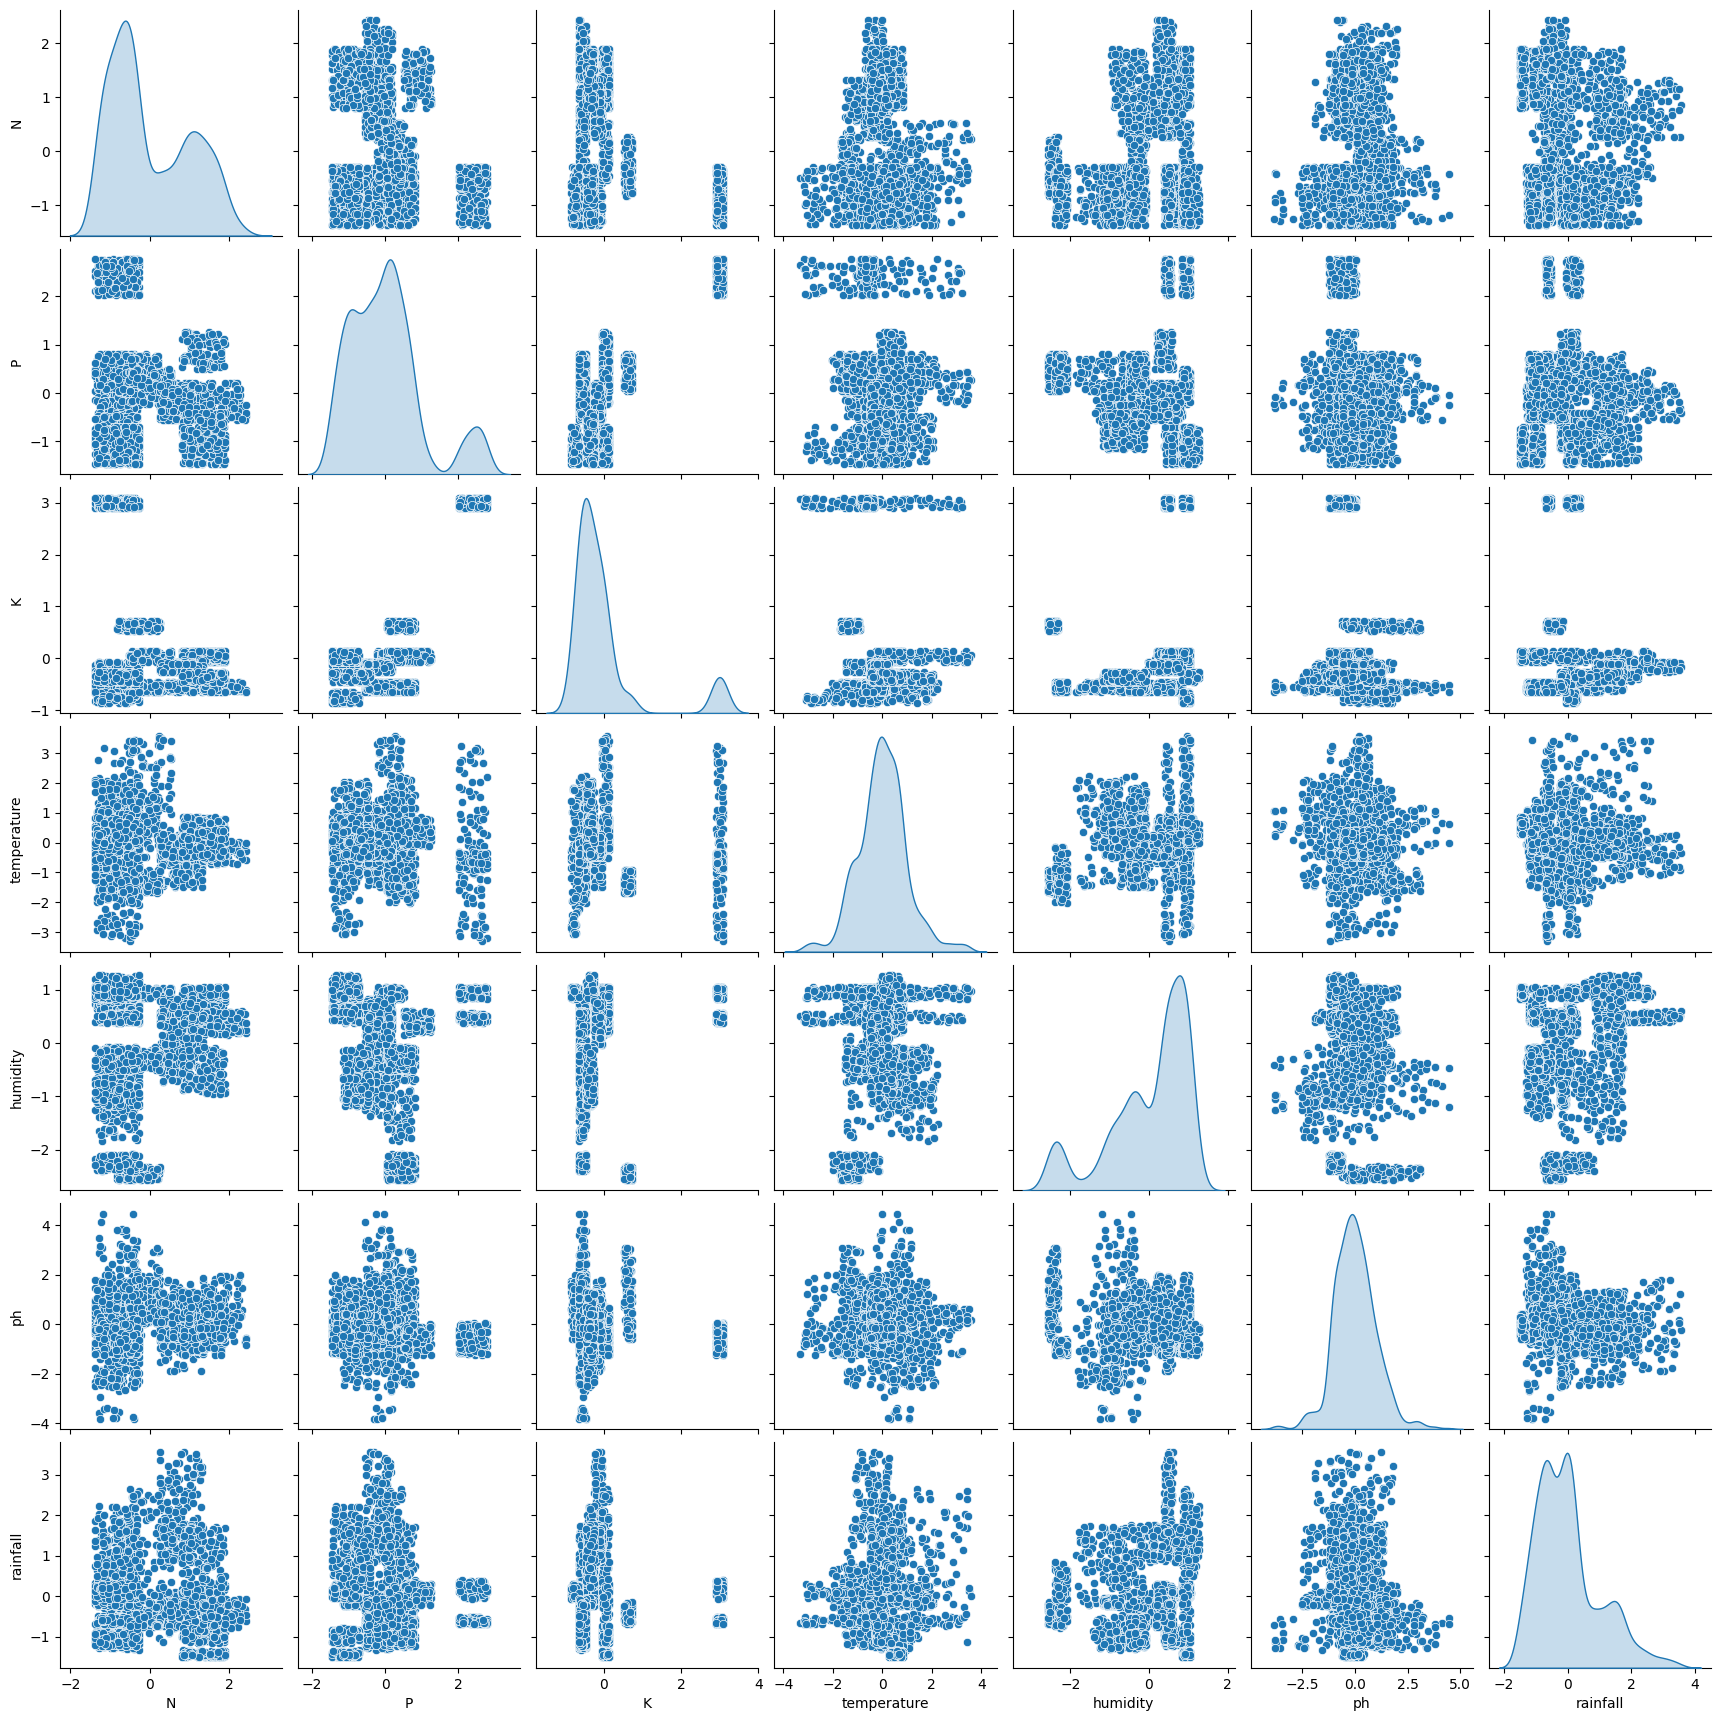

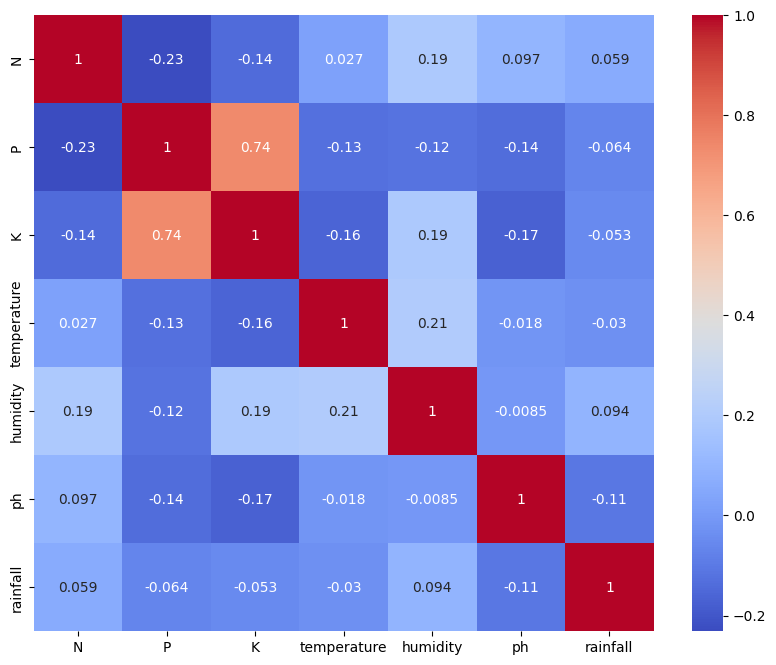

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Pairplot to see relationships between features
sns.pairplot(data[features], diag_kind='kde')
plt.show()

# Correlation heatmap (excluding the target column)
plt.figure(figsize=(10, 8))
sns.heatmap(data[features].corr(), annot=True, cmap='coolwarm')
plt.show()


***Model Building***

```markdown
Model Building

Building machine learning models is at the core of this project. We will split the data into training and testing sets, train a model on the training data, and evaluate its performance on the test data.

Data Splitting
To ensure the model's performance is robust and generalizes well to unseen data, we split the dataset into training and testing sets.

 Model Training
We will use the Random Forest algorithm, which is an ensemble learning method known for its high accuracy and ability to handle large datasets with higher dimensionality.



In [13]:
from sklearn.model_selection import train_test_split

X = data[features]
target_column = "label"
y = data[target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.9931818181818182
Classification Report:
               precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       1.00      1.00      1.00        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       0.92      1.00      0.96        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.92      1.00      0.96        11
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      0.96      0.98        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00     

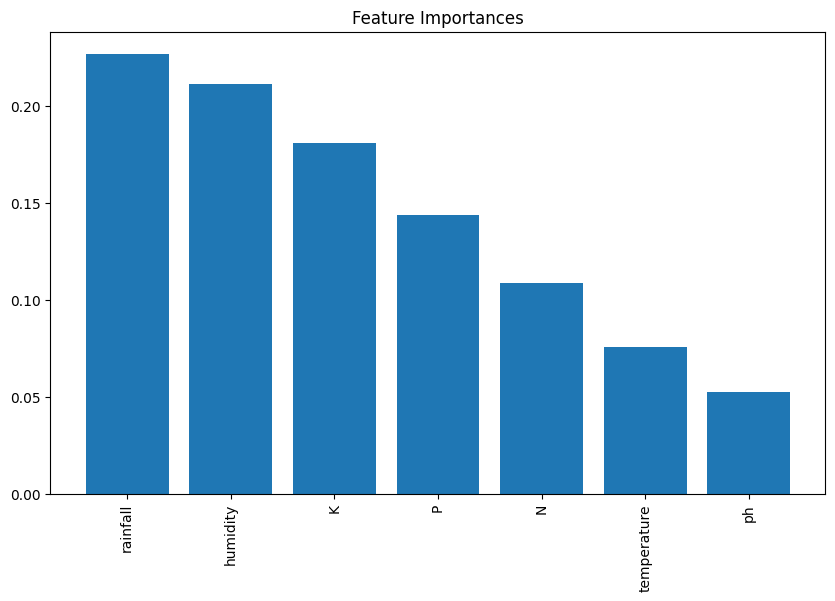

In [15]:
# Feature importance
import numpy as np

importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), [features[i] for i in indices], rotation=90)
plt.show()


In [16]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Best parameters and model
print("Best parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_


Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}


In [17]:
# Make predictions with the best model
y_pred_best = best_model.predict(X_test)

# Evaluate the best model
print("Accuracy:", accuracy_score(y_test, y_pred_best))
print("Classification Report:\n", classification_report(y_test, y_pred_best))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best))


Accuracy: 0.9931818181818182
Classification Report:
               precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       1.00      1.00      1.00        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       0.92      1.00      0.96        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.92      1.00      0.96        11
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      0.96      0.98        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00     


### Conclusion

```markdown
Conclusion

In this project, we developed a crop recommendation system using machine learning techniques. The process involved loading and inspecting the data, preprocessing it, performing exploratory data analysis, building and evaluating a model, and optimizing the model through hyperparameter tuning.

Summary of Findings
- The dataset contained various environmental and soil parameters that were used to predict the most suitable crop.
- Exploratory Data Analysis helped in understanding the relationships between different features.
- A Random Forest model was built and evaluated, achieving a good accuracy on the test set.
- Hyperparameter tuning further improved the model's performance.

Future Work
- Explore other machine learning algorithms and compare their performance.
- Incorporate more features, such as economic factors and weather forecasts, to enhance the model's accuracy.
- Develop a user-friendly interface for farmers to input their data and receive crop recommendations.
